# WEBSCRAPING TOKOPEDIA


=================================================

Nama  : Sulthan Fachry Inadamar

Objective : Program ini dibuat untuk menganalisa dan mengkonfirmasi terkait produk seblak saat ini yang sedang viral melalui webscraping data di Tokopedia

=================================================


## WEBSCRAPING

### IMPORT LIBRARY

In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import time
from bs4 import BeautifulSoup
from selenium import webdriver

### MEMBUAT DRIVER

In [70]:
driver = webdriver.Chrome()

### MEMBUAT LIST UNTUK MENYIMPAN DATA

In [71]:
nama_produk = []
harga_produk = []
total_terjual = []
nama_toko = []
kota_toko = []
rating = []

### MULAI WEB SCRAPING

#### Mengambil data produk per toko dari halaman tokopedia

In [72]:
for halaman in range (1,15):

    # Set URL
    url = f'https://www.tokopedia.com/search?navsource=&page={halaman}&q=seblak&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st='

    # Get URL
    driver.get(url)

    # Menggunakan sleep untuk menunggu page load semua
    time.sleep(3)

    # Fetch HTML
    html = driver.page_source

    # Parsing HTML
    soup = BeautifulSoup(html,'html.parser')

    # Mengambil semua data produk pada halaman tokopedia berdasarkan class yang ditentukan
    produk = soup.find_all('div',{'class':'KeRtO-dE1UuZjZ6nmihLZw=='})    

    # Looping akses per produk
    for i in produk:
        try:
            namaProduk= i.find('span',{'class' : 'OWkG6oHwAppMn1hIBsC3pQ=='})
            nama_produk.append(namaProduk.get_text()) # Append value ke list
        except:
            nama_produk.append(None)

        try:
            hargaProduk = i.find('div',{'class' : '_8cR53N0JqdRc+mQCckhS0g=='})
            harga_produk.append(hargaProduk.get_text()) # Append value ke list
        except:
            harga_produk.append(None)

        try:
            totalTerjual = i.find('span',{'class' : 'eLOomHl6J3IWAcdRU8M08A=='})
            total_terjual.append(totalTerjual.get_text()) # Append value ke list
        except:
            total_terjual.append(None)

        try:
            namaToko = i.find('span',{'class' : 'X6c-fdwuofj6zGvLKVUaNQ== -9tiTbQgmU1vCjykywQqvA== flip'})
            nama_toko.append(namaToko.get_text()) # Append value ke list
        except:
            nama_toko.append(None)
        
        try:
            kotaToko = i.find('span',{'class' : '-9tiTbQgmU1vCjykywQqvA== flip'})
            kota_toko.append(kotaToko.get_text()) # Append value ke list
        except:
            kota_toko.append(None)

        try:
            ratingProduk = i.find('span',{'class' : 'nBBbPk9MrELbIUbobepKbQ=='})
            rating.append(ratingProduk.get_text()) # Append value ke list
        except:
            rating.append(None)

    # Agar satu halaman terambil menggunakan script scroll
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)

# Memindahkan value kedalam data frame untuk ditampilkan dalam bentuk tabel
data = pd.DataFrame({
    'nama_produk' : nama_produk,
    'harga_produk' : harga_produk,
    'total_terjual' : total_terjual,
    'rating' : rating,
    'nama_toko' : nama_toko,
    'kota_toko' : kota_toko
})

# Menampilkan data frame
data
    


,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
0,"Paket Happy (Seblak Original, Batagor Kuah, Ba...",Rp59.000,None,4.9,None,None
1,Kylafood Seblak Mie Baso Sapi Play,Rp24.750,None,4.9,None,None
2,Kylafood Seblak Rempah Autentik isi (5pcs),Rp61.275,None,4.8,None,None
3,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,Rp21.630,40+ terjual,5.0,Toko kue Sumber Mas,Jakarta Timur
4,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,Rp17.000,2rb+ terjual,4.9,Central Seblak Nusantara,Tangerang Selatan
...,...,...,...,...,...,...
175,basreng pedas daun jeruk 250geram cemilan sebl...,Rp15.000,100+ terjual,4.9,seblak bandung99,Kab. Bandung
176,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,Rp2.500,10 terjual,None,Seuhahbosss,Kab. Bandung
177,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,Rp7.044,1 terjual,5.0,Hamba Snack,Bogor
178,Seblak Instan Jontor Plus Bumbu Kencur - Sebla...,Rp8.100,100+ terjual,5.0,snackbox88,Bekasi


- Dari hasil syntax diatas terlihat bahwa beberapa produk belum atau tidak memiliki `total_terjual`, `nama_toko`, dan `kota_toko`.
- Untuk case dimana produk tidak memiliki  `nama_toko`dan `kota_toko`, produk tersebut dikategorikan sebagai produk yang menggunakan ads. Sehingga nantinya akan didrop dari data frame.
- Untuk produk yang belum ada data terjual akan tetap disimpan sebagai data kosong.

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nama_produk    180 non-null    object
 1   harga_produk   180 non-null    object
 2   total_terjual  137 non-null    object
 3   rating         153 non-null    object
 4   nama_toko      145 non-null    object
 5   kota_toko      145 non-null    object
dtypes: object(6)
memory usage: 8.6+ KB


- Dari hasil syntax diatas terlihat bahwa semua kolom masih data type object. Nantinya untuk kolom `harga_produk` dan `rating` akan diubah menjadi float sedangkan `harga_produk` menjadi integer.

In [74]:
data['nama_produk'].unique

<bound method Series.unique of 0      Paket Happy (Seblak Original, Batagor Kuah, Ba...
1                     Kylafood Seblak Mie Baso Sapi Play
2             Kylafood Seblak Rempah Autentik isi (5pcs)
3      KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...
4      Seblak Instan Ceu Nthien Khas Bandung Rasana N...
                             ...                        
175    basreng pedas daun jeruk 250geram cemilan sebl...
176    Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...
177    KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...
178    Seblak Instan Jontor Plus Bumbu Kencur - Sebla...
179    Siomay Mini Kering 500gr Asli Bandung - Toppin...
Name: nama_produk, Length: 180, dtype: object>

- Dari syntax diatas, terdapat 180 unique produk yang didapatkan saat webscraping


In [75]:
data.to_csv('gc_3.csv',index=False)

- Memindahkan atau save data kedalam csv

## DATA CLEANING

### Read file CSV

In [3]:
gc3 = pd.read_csv('gc_3.csv')
gc3

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630.0,40,5.0,Toko kue Sumber Mas,Jakarta Timur
1,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000.0,2000,4.9,Central Seblak Nusantara,Tangerang Selatan
2,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,500,5.0,Brother Meat Shop,Depok
3,Seblak Rafael/Seblak Coet Instan Halal,26600.0,500,4.9,Foodstocks,Jakarta Selatan
4,Seblak instan komplit / seblak instan murah,5000.0,100,4.7,ismileusa_id,Kab. Bandung
...,...,...,...,...,...,...
140,basreng pedas daun jeruk 250geram cemilan sebl...,15000.0,100,4.9,seblak bandung99,Kab. Bandung
141,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,2500.0,10,0.0,Seuhahbosss,Kab. Bandung
142,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,7044.0,1,5.0,Hamba Snack,Bogor
143,Seblak Instan Jontor Plus Bumbu Kencur - Sebla...,8100.0,100,5.0,snackbox88,Bekasi


- Membaca kembali data csv

### Membersihkan data numeric yang masih ada string

In [5]:
gc3['harga_produk']=gc3['harga_produk'].str.replace('Rp','')
gc3['harga_produk']=gc3['harga_produk'].str.replace('.','')

gc3['total_terjual']=gc3['total_terjual'].str.replace('terjual','')
gc3['total_terjual']=gc3['total_terjual'].str.replace('+','')
gc3['total_terjual']=gc3['total_terjual'].str.replace('rb','000')

AttributeError: Can only use .str accessor with string values!

In [ ]:
gc3

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
0,"Paket Happy (Seblak Original, Batagor Kuah, Ba...",59000,NaN,4.9,NaN,NaN
1,Kylafood Seblak Mie Baso Sapi Play,24750,NaN,4.9,NaN,NaN
2,Kylafood Seblak Rempah Autentik isi (5pcs),61275,NaN,4.8,NaN,NaN
3,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630,40,5.0,Toko kue Sumber Mas,Jakarta Timur
4,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000,2000,4.9,Central Seblak Nusantara,Tangerang Selatan
...,...,...,...,...,...,...
175,basreng pedas daun jeruk 250geram cemilan sebl...,15000,100,4.9,seblak bandung99,Kab. Bandung
176,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,2500,10,NaN,Seuhahbosss,Kab. Bandung
177,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,7044,1,5.0,Hamba Snack,Bogor
178,Seblak Instan Jontor Plus Bumbu Kencur - Sebla...,8100,100,5.0,snackbox88,Bekasi


### Menghapus baris yang memiliki value null pada kolom `nama_toko` dan `kota_toko`

In [ ]:
gc3.dropna(subset=['nama_toko'],inplace=True)
gc3

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
3,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630.0,40,5.0,Toko kue Sumber Mas,Jakarta Timur
4,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000.0,2000,4.9,Central Seblak Nusantara,Tangerang Selatan
5,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,500,5.0,Brother Meat Shop,Depok
6,Seblak Rafael/Seblak Coet Instan Halal,26600.0,500,4.9,Foodstocks,Jakarta Selatan
7,Seblak instan komplit / seblak instan murah,5000.0,100,4.7,ismileusa_id,Kab. Bandung
...,...,...,...,...,...,...
175,basreng pedas daun jeruk 250geram cemilan sebl...,15000.0,100,4.9,seblak bandung99,Kab. Bandung
176,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,2500.0,10,0.0,Seuhahbosss,Kab. Bandung
177,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,7044.0,1,5.0,Hamba Snack,Bogor
178,Seblak Instan Jontor Plus Bumbu Kencur - Sebla...,8100.0,100,5.0,snackbox88,Bekasi


In [ ]:
gc3 = gc3.fillna(0)
gc3['harga_produk'] = gc3['harga_produk'].astype(float)
gc3['total_terjual'] = gc3['total_terjual'].astype(int)

In [ ]:
gc3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 3 to 179
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_produk    145 non-null    object 
 1   harga_produk   145 non-null    float64
 2   total_terjual  145 non-null    int64  
 3   rating         145 non-null    float64
 4   nama_toko      145 non-null    object 
 5   kota_toko      145 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [ ]:
gc3.head(20)

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
3,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630.0,40,5.0,Toko kue Sumber Mas,Jakarta Timur
4,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000.0,2000,4.9,Central Seblak Nusantara,Tangerang Selatan
5,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,500,5.0,Brother Meat Shop,Depok
6,Seblak Rafael/Seblak Coet Instan Halal,26600.0,500,4.9,Foodstocks,Jakarta Selatan
7,Seblak instan komplit / seblak instan murah,5000.0,100,4.7,ismileusa_id,Kab. Bandung
8,Kylafood Seblak Rempah Authentik,8888.0,2000,4.9,kylafood,Bandung
9,SEBLAK INSTANT TERMURAH,4450.0,10000,4.8,Pusat Cuankie & Cemilan Frozen,Jakarta Timur
10,Seblak Instan Pedas Home Made,3500.0,4000,4.9,the Dhecip,Tangerang Selatan
11,Kerupuk Mentah 250gr Seblak Mentah,5900.0,1000,5.0,Pedas Gilaa,Surabaya
12,Seblak Instant Homemade Lengkap Bumbu,5500.0,3000,4.8,Pedas Gilaa,Surabaya


In [ ]:
gc3.tail(20)

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
157,Pasar Keripik Kerupuk Seblak Mawar Pedas size ...,65000.0,11,4.9,Pasar Keripik Bandung,Bandung
158,Mie Seblak Geprek SamiRaos Original | Seblak M...,20000.0,13,5.0,Lemari Wanita,Jakarta Timur
159,Mie Seblak Geprek Sami Raos Khas Garut Seblak ...,18900.0,100,5.0,Foodstocks,Jakarta Selatan
160,cuanki tahu panjang isi 150 pcs | toping sebla...,34999.0,40,5.0,CUANKI CULAMETAN,Kab. Garut
161,Seblak Kering Bangsatria 170gr (Organik Food S...,21000.0,0,0.0,Foodstocks,Jakarta Selatan
162,BlueAcc SEBLAK INSTAN MANG MUSS,25000.0,4,5.0,Blue Accesoriees,Jakarta Barat
163,Baso Aci GEPREK Seblak GEPREK boci instant sam...,17999.0,70,4.9,Pusat Baso Aci,Surabaya
164,Kerupuk Warna Warni | Kerupuk Seblak 250 gr,6000.0,7,5.0,SAHABAT ANUGRAH STORE,Medan
165,Seblak Instan Pedas Murah Seblak Instant Kompl...,5000.0,0,0.0,serbagrosir22,Kab. Kudus
166,SNACK MAKARONI CRISPY PEDAS 100 GRAM SPICY MAC...,7900.0,27,5.0,AUFARO SNACK,Kab. Bandung Barat


In [2]:
gc3.to_csv('gc_3.csv',index=False)

NameError: name 'gc3' is not defined

## Business Understanding/Problem Statement

**S**pecific : Menambah pendapatan uang saku dengan cara menjual produk yang sedang trending (seblak) melalui e-commerce TOKOPEDIA.

**M**easurable : Menjual 150 produk seblak di TOKOPEDIA.

**A**ttainable : Melakukan analisa data dengan menggunakan web-scraping untuk mencari harga optimal dari harga pasar di TOKOPEDIA.

**R**ealistic : Mencari harga yang optimal dapat meningkatkan tingkat penjualan produk (seblak).

**T**ime-bound : Goals di set 5 Bulan dimana perbulan ditargetkan terjual 30 produk.

Problem Statement:
Goalsnya adalah untuk menambah pendapatan uang saku dengan menjual 150 produk seblak ditokopedia dalam kurung waktu 5 Bulan dengan cara menganalisis data menggunakan data jual produk seblak di TOkopedia untuk mencari harga yang optimal.

## ANALYSIS

In [4]:
gc3 = pd.read_csv('gc_3.csv')
gc3

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630.0,40,5.0,Toko kue Sumber Mas,Jakarta Timur
1,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000.0,2000,4.9,Central Seblak Nusantara,Tangerang Selatan
2,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,500,5.0,Brother Meat Shop,Depok
3,Seblak Rafael/Seblak Coet Instan Halal,26600.0,500,4.9,Foodstocks,Jakarta Selatan
4,Seblak instan komplit / seblak instan murah,5000.0,100,4.7,ismileusa_id,Kab. Bandung
...,...,...,...,...,...,...
140,basreng pedas daun jeruk 250geram cemilan sebl...,15000.0,100,4.9,seblak bandung99,Kab. Bandung
141,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,2500.0,10,0.0,Seuhahbosss,Kab. Bandung
142,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,7044.0,1,5.0,Hamba Snack,Bogor
143,Seblak Instan Jontor Plus Bumbu Kencur - Sebla...,8100.0,100,5.0,snackbox88,Bekasi


### MEAN

#### Kalkulasi **mean** dari kolom `harga_produk`, `total_terjual`, `rating`

In [5]:
mean_harga = round(gc3['harga_produk'].mean(),2)
mean_total_terjual = round(gc3['total_terjual'].mean(),2)
mean_rating = round(gc3['rating'].mean(),2)

### MEDIAN

#### Kalkulasi **median** dari kolom `harga_produk`, `total_terjual`, `rating`

In [6]:
med_harga = round(gc3['harga_produk'].median(),2)
med_total_terjual = round(gc3['total_terjual'].median(),2)
med_rating = round(gc3['rating'].median(),2)

### STANDARD DEVIATION

#### Kalkulasi **standard deviation** dari kolom `harga_produk`, `total_terjual`, `rating`

In [7]:
std_harga = round(gc3['harga_produk'].std(),2)
std_total_terjual = round(gc3['total_terjual'].std(),2)
std_rating = round(gc3['rating'].std(),2)

### SKEWNESS

#### Kalkulasi **skewness** dari kolom `harga_produk`, `total_terjual`, `rating`

In [8]:
skw_harga = round(gc3['harga_produk'].skew(),2)
skw_total_terjual = round(gc3['total_terjual'].skew(),2)
skw_rating = round(gc3['rating'].skew(),2)

### KURTOSIS

#### Kalkulasi **kurtosis** dari kolom `harga_produk`, `total_terjual`, `rating`

In [9]:
krt_harga = round(gc3['harga_produk'].kurt(),2)
krt_total_terjual = round(gc3['total_terjual'].kurt(),2)
krt_rating = round(gc3['rating'].kurt(),2)

### HASIL ANALISIS

Membuat series baru dari semua kalkulasi diatas dengan menggunakan fungsi dari pandas **pd.Series** lalu menggunakan fungsi **pd.concat** untuk mengkombinasikan semua kolomnya

In [10]:
mean = pd.Series([mean_harga, mean_total_terjual, mean_rating], index=['Harga Produk', 'Total Terjual', 'Rating'], name='Mean')
med = pd.Series([med_harga, med_total_terjual, med_rating], index=['Harga Produk', 'Total Terjual', 'Rating'], name='Median')
std = pd.Series([std_harga, std_total_terjual, std_rating], index=['Harga Produk', 'Total Terjual', 'Rating'], name='Standard Deviation')
skw = pd.Series([skw_harga, skw_total_terjual, skw_rating], index=['Harga Produk', 'Total Terjual', 'Rating'], name='Skewness')
krt = pd.Series([krt_harga, krt_total_terjual, krt_rating], index=['Harga Produk', 'Total Terjual', 'Rating'], name='Kurtosis')

In [11]:
# Menggunakan fungsi concat untuk mengkombinasikan series diatas
analysis = pd.concat([round(mean,2), round(med,2), round(std,2), round(skw,2), round(krt,2)], axis=1)

# Menampilkan hasil data
print(analysis)

                   Mean   Median  Standard Deviation  Skewness  Kurtosis
Harga Produk   20619.81  16695.0            19688.04      3.01     12.67
Total Terjual    498.45    100.0             1185.10      4.76     30.13
Rating             4.52      4.9                1.26     -3.26      9.09


#### HARGA PRODUK

In [12]:
# Menampilkan hasil analisis harga produk
analysis_harga = pd.Series([mean_harga,med_harga,std_harga,skw_harga,krt_harga],index=['Mean','Median','Standard Deviation','Skewness','Kurtosis'])
print(analysis_harga)

Mean                  20619.81
Median                16695.00
Standard Deviation    19688.04
Skewness                  3.01
Kurtosis                 12.67
dtype: float64


Setelah menganalisa data diatas dapat dikonlusikan bahwa data `harga_produk`:
- Distribusi `data tidak normal` karena hasil dari `skewnes > 1` yaitu `3.01`
- Dikarenakan `mean > median` maka distribusi data adalah `positive skrew`
- `Kurtosis value lebih dari 0` maka mengindikasikan data memiliki banyak outlier
- Rata-rata harga produk yang dijual di tokopedia ada di **Rp. 20,600.00**

#### TOTAL TERJUAL

In [13]:
# Menampilkan hasil analisis total_terjual
analysis_total_terjual = pd.Series([mean_total_terjual,med_total_terjual,std_total_terjual,skw_total_terjual,krt_total_terjual],index=['Mean','Median','Standard Deviation','Skewness','Kurtosis'])
print(analysis_total_terjual)

Mean                   498.45
Median                 100.00
Standard Deviation    1185.10
Skewness                 4.76
Kurtosis                30.13
dtype: float64


Setelah menganalisa data diatas dapat dikonlusikan bahwa data `total_terjual`:
- Distribusi `data tidak normal` karena hasil dari `skewnes > 1` yaitu `4.76`
- Dikarenakan `mean > median` maka distribusi data adalah `positive skrew`
- `Kurtosis value lebih dari 0` maka mengindikasikan data memiliki banyak outlier
- Rata-rata produk yang terjual di tokopedia ada di kisaran **498**pcs

#### RATING

In [14]:
# Menampilkan hasil analisis rating
analysis_rating = pd.Series([mean_rating,med_rating,std_rating,skw_rating,krt_rating],index=['Mean','Median','Standard Deviation','Skewness','Kurtosis'])
print(analysis_rating)

Mean                  4.52
Median                4.90
Standard Deviation    1.26
Skewness             -3.26
Kurtosis              9.09
dtype: float64


Setelah menganalisa data diatas dapat dikonlusikan bahwa data `rating`:
- Distribusi data tidak normal karena hasil dari `skewnes < 1` yaitu `-3.26`. Sehingga bisa dibilang data ini `Highly Skewed`.
- Dikarenakan `mean < median` maka distribusi data adalah `negative skrew`.
- `Kurtosis value > 0` maka mengindikasikan data memiliki banyak outlier.
- Rata-rata rating produk yang ada di tokopedia ada di **4.52**

### CONFIDENCE INTERVAL

Menggunakan Confidence Interval mendapatkan `lower value` dan `upper value` dari data harga jual seblak

In [15]:
std = gc3['harga_produk'].std()
n = len(gc3)
low, up = stats.norm.interval(0.95,loc=gc3['harga_produk'].mean(),scale=std/np.sqrt(n))
print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 17415.260251756525
Upper Limit: 23824.35354134692


In [33]:
maximum = up*30 # Kalkulasi pendapatan maximum
minimum = low*30 # Kalkulasi pendapatan minimum

# Menampillkam hasil kalkulasi
print(f"Pendapatan minimum perbulan : Rp. {round(minimum,2)}")
print(f"Pendapatan maximum perbulan : Rp. {round(maximum,2)}")

print(f"Pendapatan minimum dalam 5 bulan (goals) : Rp. {round(minimum*5,2)}")
print(f"Pendapatan maximum dalam 5 bulan (goals) : Rp. {round(maximum*5,2)}")

Pendapatan minimum perbulan : Rp. 522457.81
Pendapatan maximum perbulan : Rp. 714730.61
Pendapatan minimum dalam 5 bulan (goals) : Rp. 2612289.04
Pendapatan maximum dalam 5 bulan (goals) : Rp. 3573653.03


- Setelah dilakukan confidence interval dengan confidence level 95%, hasil pendapatan maximum dan pendapatan minimum perbulannya adalah:
- Pendapatan Minimum = `Rp.522,457.81`
- Pendapatan Maximum = `Rp.714,730.61`


### ANALISA HARGA BARANG

HIPOTESIS:

$H_0$(>0,5): Tidak ada perbedaan harga diluar `JABODETABEK`

$H_1$(<0.5): Ada Perbedaan harga diluar `JABODETABEK`

In [17]:
gc3['kota_toko'].unique() # Melihat ada berapa kota yang ada pada data frame

array(['Jakarta Timur', 'Tangerang Selatan', 'Depok', 'Jakarta Selatan',
       'Kab. Bandung', 'Bandung', 'Surabaya', 'Jakarta Barat',
       'Tangerang', 'Kab. Bandung Barat', 'Tasikmalaya', 'Kab. Garut',
       'Cimahi', 'Kab. Tangerang', 'Kab. Subang', 'Jakarta Pusat',
       'Kab. Kediri', 'Kab. Cirebon', 'Kab. Badung', 'Kab. Jombang',
       'Kab. Mojokerto', 'Kediri', 'Medan', 'Kab. Kudus', 'Bogor',
       'Bekasi'], dtype=object)

In [18]:
# Membuat list jabodetabek untuk menampung value kota di jabodetabek pada data frame
jabodetabek = ['Jakarta Timur','Jakarta Pusat','Jakarta Selatan','Jakarta Barat','Bogor','Depok','Tangerang Selatan','Kab. Tangerang','Tangerang','Bekasi']

In [19]:
# Membuat kolom baru untuk mengkategorisasikan kota_toko yang berada didalam atau diluar JABODETABEK
daerah = {kota: 'Jabodetabek' for kota in jabodetabek} 
daerah.update({kota: 'Luar Jabodetabek' for kota in gc3['kota_toko'].unique() if kota not in jabodetabek}) # Validasi data jika didalam atau diluar JABODETABEK

gc3['daerah'] = gc3['kota_toko'].map(daerah) # Membuat kolom baru dan membagikan sesuai dengan validasi diatas


In [20]:
gc3

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko,daerah
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630.0,40,5.0,Toko kue Sumber Mas,Jakarta Timur,Jabodetabek
1,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000.0,2000,4.9,Central Seblak Nusantara,Tangerang Selatan,Jabodetabek
2,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,500,5.0,Brother Meat Shop,Depok,Jabodetabek
3,Seblak Rafael/Seblak Coet Instan Halal,26600.0,500,4.9,Foodstocks,Jakarta Selatan,Jabodetabek
4,Seblak instan komplit / seblak instan murah,5000.0,100,4.7,ismileusa_id,Kab. Bandung,Luar Jabodetabek
...,...,...,...,...,...,...,...
140,basreng pedas daun jeruk 250geram cemilan sebl...,15000.0,100,4.9,seblak bandung99,Kab. Bandung,Luar Jabodetabek
141,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,2500.0,10,0.0,Seuhahbosss,Kab. Bandung,Luar Jabodetabek
142,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,7044.0,1,5.0,Hamba Snack,Bogor,Jabodetabek
143,Seblak Instan Jontor Plus Bumbu Kencur - Sebla...,8100.0,100,5.0,snackbox88,Bekasi,Jabodetabek


In [29]:
gc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_produk    145 non-null    object 
 1   harga_produk   145 non-null    float64
 2   total_terjual  145 non-null    int64  
 3   rating         145 non-null    float64
 4   nama_toko      145 non-null    object 
 5   kota_toko      145 non-null    object 
 6   daerah         145 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.1+ KB


Menampilkan data frame JABODETABEK

In [21]:
daerah_jabodetabek = gc3[gc3['daerah']=='Jabodetabek'] 

daerah_jabodetabek

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko,daerah
0,KRUPUK SEBLAK RAFAEL | SEBRING | KERUPUK MAWAR...,21630.0,40,5.0,Toko kue Sumber Mas,Jakarta Timur,Jabodetabek
1,Seblak Instan Ceu Nthien Khas Bandung Rasana N...,17000.0,2000,4.9,Central Seblak Nusantara,Tangerang Selatan,Jabodetabek
2,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,500,5.0,Brother Meat Shop,Depok,Jabodetabek
3,Seblak Rafael/Seblak Coet Instan Halal,26600.0,500,4.9,Foodstocks,Jakarta Selatan,Jabodetabek
6,SEBLAK INSTANT TERMURAH,4450.0,10000,4.8,Pusat Cuankie & Cemilan Frozen,Jakarta Timur,Jabodetabek
...,...,...,...,...,...,...,...
137,Emping Balado 130g,13500.0,100,4.9,oke snack,Jakarta Selatan,Jabodetabek
138,Keripik Ubi Ungu Sari Roso,26000.0,250,5.0,Pisang Goreng Madu Bu Nanik,Jakarta Barat,Jabodetabek
139,Baso Aci Bapper Tulang Rangu Sambel Mercon Asl...,25800.0,500,4.9,Foodstocks,Jakarta Selatan,Jabodetabek
142,KERUPUK SEBLAK CK PEDAS 75g | KERIPIK SEBLAK K...,7044.0,1,5.0,Hamba Snack,Bogor,Jabodetabek


Menampilkan data frame luar JABODETABEK

In [22]:
daerah_non_jabodetabek = gc3[gc3['daerah']=='Luar Jabodetabek'] 

daerah_non_jabodetabek

,nama_produk,harga_produk,total_terjual,rating,nama_toko,kota_toko,daerah
4,Seblak instan komplit / seblak instan murah,5000.0,100,4.7,ismileusa_id,Kab. Bandung,Luar Jabodetabek
5,Kylafood Seblak Rempah Authentik,8888.0,2000,4.9,kylafood,Bandung,Luar Jabodetabek
8,Kerupuk Mentah 250gr Seblak Mentah,5900.0,1000,5.0,Pedas Gilaa,Surabaya,Luar Jabodetabek
9,Seblak Instant Homemade Lengkap Bumbu,5500.0,3000,4.8,Pedas Gilaa,Surabaya,Luar Jabodetabek
13,kerupuk seblak ALN2 kemasan 100 gr,12000.0,0,0.0,grosir sembako Aln2,Kab. Bandung Barat,Luar Jabodetabek
...,...,...,...,...,...,...,...
134,SNACK MAKARONI CRISPY PEDAS 100 GRAM SPICY MAC...,7900.0,27,5.0,AUFARO SNACK,Kab. Bandung Barat,Luar Jabodetabek
135,Cimol Bojot Pedas Cilok Goreng Bumbu Pedas Bub...,6652.0,1000,4.9,Berkah Food Bandung,Cimahi,Luar Jabodetabek
140,basreng pedas daun jeruk 250geram cemilan sebl...,15000.0,100,4.9,seblak bandung99,Kab. Bandung,Luar Jabodetabek
141,Seblak Instan Bumbu Sudah Lengkap Siap Di Masa...,2500.0,10,0.0,Seuhahbosss,Kab. Bandung,Luar Jabodetabek


Kalkulasi rata-rata harga produk di JABODETABEK

In [23]:
harga_jabodetabek = daerah_jabodetabek['harga_produk'].mean()
print(f"Rata-rata harga produk didalam JABODETABEK : {round(harga_jabodetabek,2)}")

Rata-rata harga produk didalam JABODETABEK : 22500.73


Kalkulasi rata-rata harga produk diluar JABODETABEK

In [24]:
harga_non_jabodetabek = daerah_non_jabodetabek['harga_produk'].mean()
print(f"Rata-rata harga produk diluar JABODETABEK : {round(harga_non_jabodetabek,2)}")

Rata-rata harga produk diluar JABODETABEK : 19133.64


In [25]:
t_stat, p_val = stats.ttest_ind(daerah_jabodetabek['harga_produk'],daerah_non_jabodetabek['harga_produk'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 1.0227521726959163
P-value: 0.3081521151587753


- Data sample lebih dari 30 maka menggunakan T-Statistic
- Dikarenakan p-value<0.5 maka H0 ditolak dan H1 diterima

### TEST KORELASI

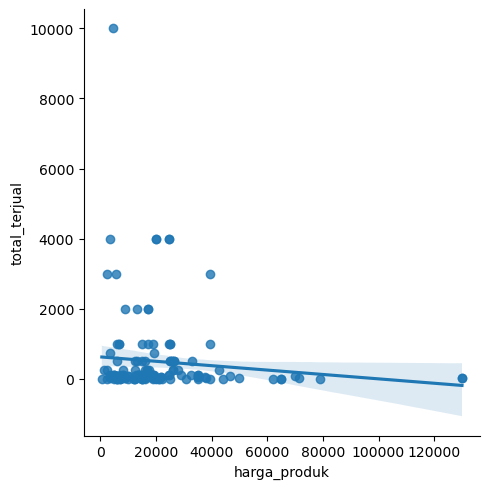

In [26]:
sns.lmplot(data=gc3,x='harga_produk', y='total_terjual')

Berdasarkan grafik diatas, antara harga produk dan total terjual memiliki hubungan negatif namun sangat lemah

In [27]:
corr_r, pval_p = stats.pearsonr(gc3['rating'], gc3['harga_produk'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")

r-correlation: -0.11, p-value: 0.17155891240615725


In [31]:
gc3.to_json('temp.json', orient='records', lines=True)

Hasil analisa syntax diatas :
- Menggunakan Pearson Correlation analysis karena hubungan antara dua variables continous dan hubungannya linear.
- Dikarenakan hasil r-correlation mendekati 0 maka hubungan antara dua variabel tersebut sangat lemah.

## KONKLUSI

Berdasarkan analysis diatas dapat dikonklusikan:
- Rata-rata produk yang dijual di tokpedia dengan harga **Rp.20,619.81** dengan total rata-rata produk terjual **498**
- Adanya perbedaan antara rata-rata harga produk di JABODETABEK dengan harga **Rp.22,500** dan diluar JABODETABEK dengan harga **Rp.19,133**
- Korelasi antara harga produk dan total terjual produk negative lemah yang menandakan bahwa semakin tinggi harga jual maka semakin dikit produk yang terjual.

Berdasarkan rata-rata harga penjualan di JABODETABEK dan korelasi negatif antara harga produk dan produk terjual dapat disimpulkan bahwa dengan menjual produk seblak dengan harga **Rp.21,000** didalam JABODETABEK dapat meningkatkan tingkat penjualan di TOKOPEDIA dan goals dapat tercapai dalam 5 bulan kedepan